<a href="https://colab.research.google.com/github/JiseokSeo/-I-studied-/blob/main/hackon_nlp_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

해설/정리 : https://road-slug-941.notion.site/NLP-f830fa0dd5144e208c6f8643667dcbee  
데이터셋 출처 : https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset

In [1]:
# upload the kaggle token
from google.colab import files
kaggle_token = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# download kaggle datasets by kaggle API
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d zusmani/pakistans-largest-ecommerce-dataset
!unzip -q /content/pakistans-largest-ecommerce-dataset.zip

 51% 7.00M/13.8M [00:00<00:00, 69.0MB/s]
100% 13.8M/13.8M [00:00<00:00, 80.4MB/s]


In [3]:
# install libraries needed
!pip install datasets
!pip install category_encoders
!pip install transformers
# !pip install torchtext
# !pip install torchtext --upgrade
# !pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.9 MB/s 
     |████████████████████████████████| 132 kB 48.3 MB/s 
     |████████████████████████████████| 212 kB 49.4 MB/s 
     |████████████████████████████████| 182 kB 66.7 MB/s 
     |████████████████████████████████| 127 kB 73.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 535 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 3.4 MB/s 
     |████████████████████████████████| 7.6 MB 9.2 MB/s 


In [4]:
# To EDA
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [5]:
# Data importing
df_origin = pd.read_csv('/content/Pakistan Largest Ecommerce Dataset.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df_origin.shape

(1048575, 26)

In [7]:
# Drop NaN
df = df_origin.dropna(subset=['sku', 'category_name_1']) #결측값 드랍 (문제 형성의 필수조건이라 drop)

In [8]:
df.shape

(584340, 26)

In [9]:
# It is too big to progress in colab
df = df.sample(20000, random_state=42)
df.reset_index(drop=True, inplace=True)

In [10]:
df = df[['sku', 'price', 'category_name_1']] # hackon-like shape
df.rename(columns={'category_name_1':'label'}, inplace=True)
df.head()

,sku,price,label
0,Lala_USS17-LDS-012C,1400.0,Women's Fashion
1,COMA4-59AC87AAE7C63,1225.0,Computing
2,MATSAM5B10E73CC6A74,16199.0,Mobiles & Tablets
3,Audionic_B-880,1375.0,Computing
4,kcc_krone deal,360.0,Beauty & Grooming


In [11]:
# distriution of Target
df['label'].nunique(), df['label'].unique()

(16, array(["Women's Fashion", 'Computing', 'Mobiles & Tablets',
        'Beauty & Grooming', 'Superstore', "Men's Fashion", '\\N',
        'Home & Living', 'Others', 'Soghaat', 'Kids & Baby', 'Appliances',
        'Entertainment', 'Health & Sports', 'School & Education', 'Books'],
       dtype=object))

[]

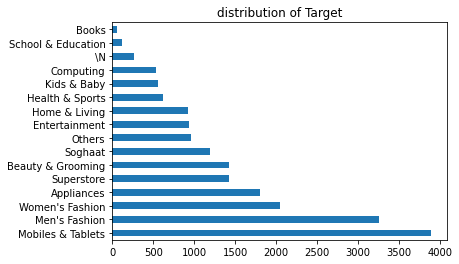

In [12]:
# Visualize the Target
df['label'].value_counts().plot.barh()
plt.title('distribution of Target')
plt.plot()

In [13]:
# check the null
df.isnull().sum()

sku      0
price    0
label    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


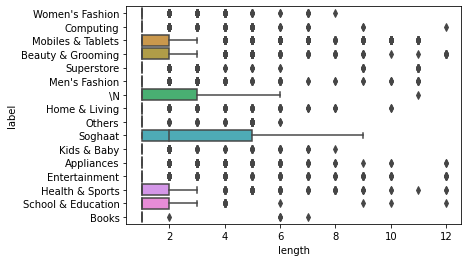

In [14]:
# visualize the length by target
df['length'] = df['sku'].str.split().apply(len)
sns.boxplot('length',
            'label',
            data=df
            )
plt.show()

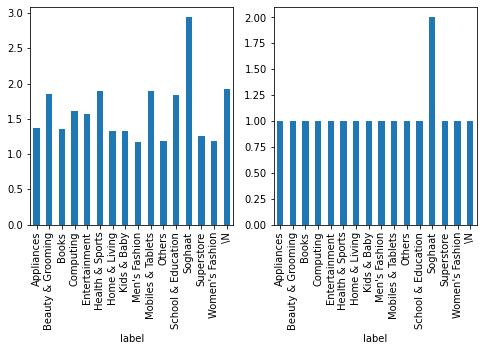

In [15]:
# mean, median of length
f, ax = plt.subplots(1, 2, figsize=(8, 4))
df.groupby('label')['length'].mean().plot.bar(ax=ax[0])
df.groupby('label')['length'].median().plot.bar(ax=ax[1])
plt.show()

In [16]:
## prepare the datasets
df.drop(columns=['length'], inplace=True)

In [17]:
# train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                              test_size=0.15,
                              stratify=df['label'],
                              random_state=42)

In [18]:
train['label'].nunique(), test['label'].nunique()

(16, 16)

In [19]:
from category_encoders import OrdinalEncoder
ord_enc = OrdinalEncoder(cols=['label'])
train = ord_enc.fit_transform(train)
test = ord_enc.transform(test)

In [20]:
test

,sku,price,label
16253,SOGSND5A43754265E11,520.0,1
13822,xiaomi_mi-c3-32gb-Gold,14500.0,10
17366,MEFHOU59FB3ADCC68AA-XL,1999.0,8
15692,MATXIA59BA4F97DD6D0,14500.0,10
12132,Apple iPhone 6 (64GB) Gold,69390.0,10
...,...,...,...
18712,HALBED5A682952CD574,750.0,7
9304,KABMUM59AC787229078,1170.0,13
2206,BO_nonRC-Jeep-Red,250.0,13
9831,MATSAM59B7E8D3E0A3E,13742.0,10


In [21]:
# convert pd.DataFrame to datasetDict
import datasets

train_dataset = datasets.Dataset.from_dict(train)
test_dataset = datasets.Dataset.from_dict(test)
df_dataset = datasets.DatasetDict({"train":train_dataset,"test":test_dataset})

In [22]:
df_dataset

DatasetDict({
    train: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 17000
    })
    test: Dataset({
        features: ['sku', 'price', 'label'],
        num_rows: 3000
    })
})

In [23]:
df_dataset['train']['sku'][514]

'GG_RTW004-Large'

In [24]:
# for modeling
import torch
import torch.nn as nn

In [25]:
# pretrained model import
from transformers import AutoModel

# declare the name of pretrained model
model_ckpt = 'distilbert-base-uncased'

# (automatically) import tokenizer of pretrained model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [26]:
# func definition for tokenizing
def tokenize(batch):
	return tokenizer(batch['sku'], padding=True, truncation=True)

In [27]:
## tokenizing

# sample
print(tokenize(df_dataset['train'][1:2]))

{'input_ids': [[101, 27178, 22269, 27421, 2629, 7875, 19481, 2487, 4402, 2050, 16086, 10790, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [28]:
# tokenizing all
dataset_enc = df_dataset.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [29]:
# check the result
print(dataset_enc['train'].column_names)

['sku', 'price', 'label', 'input_ids', 'attention_mask']


In [30]:
## modeling processes
print(tokenizer(dataset_enc['train']['sku'][1:2]))

{'input_ids': [[101, 27178, 22269, 27421, 2629, 7875, 19481, 2487, 4402, 2050, 16086, 10790, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [31]:
# dataset_enc = dataset_enc.remove_columns(['sku'])

In [32]:
dataset_enc

DatasetDict({
    train: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 17000
    })
    test: Dataset({
        features: ['sku', 'price', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3000
    })
})

In [33]:
# func def for hidden_states
def extract_hidden_states(batch):
	inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
	with torch.no_grad():
		last_hidden_state = model(**inputs).last_hidden_state

	return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

In [34]:
# set the model and device
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)  

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [35]:
# converting the dataset to Tensor for using dataset to inputs
dataset_enc.set_format('torch', columns=['label', 'price', 'input_ids', 'attention_mask'])

In [36]:
# get hidden states
dataset_hidden = dataset_enc.map(extract_hidden_states, batched=True)

  0%|          | 0/17 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

In [37]:
dataset_hidden['train'].column_names

['sku', 'price', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [38]:
X_train = np.array(dataset_hidden['train']['hidden_state'])
X_test = np.array(dataset_hidden['test']['hidden_state'])
y_train = np.array(dataset_hidden['train']['label'])
y_test = np.array(dataset_hidden['test']['label'])

In [39]:
# X(hidden state), y(labels) are numberical data either so I try LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8923333333333333

In [40]:
#almost randomized model
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_train, y_train)

0.19494117647058823

In [41]:
## hyperparameters tunning

In [42]:
# pretrained model import for setting the Trainer
from transformers import AutoModelForSequenceClassification

num_labels = 17
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))
## It was supposed to be 16, but there was an error when it was 16. So I put 17, it works. I don't know why.

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [43]:
# setting the score for setting the Trainer

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
	labels = pred.label_ids
	preds = pred.predictions.argmax(-1)
	f1 = f1_score(labels, preds, average='weighted')
	acc = accuracy_score(labels, preds)
	return {'accuracy':acc, 'f1':f1}

In [44]:
## Train

In [48]:
# TrainingArguments definition for Trainer
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(dataset_enc['train']) // batch_size
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir=model_name,
																	num_train_epochs=5,
																	learning_rate=2e-5,
																	per_device_train_batch_size=batch_size,
																	per_device_eval_batch_size=batch_size,
																	weight_decay=0.01,
																	evaluation_strategy='epoch',
																	disable_tqdm=False,
																	logging_steps=logging_steps,
																	push_to_hub=False,
																	save_strategy='epoch',
																	load_best_model_at_end=True,
																	log_level='error')

In [49]:
# Trainer setting, train
from transformers import Trainer
from transformers import DataCollatorForTokenClassification

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=compute_metrics,
									train_dataset=dataset_enc['train'],
									eval_dataset=dataset_enc['test'],
									tokenizer=tokenizer
                  )

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.328400,0.259804,0.933333,0.932262
2,0.186500,0.190952,0.949000,0.948953
3,0.137100,0.168441,0.958000,0.958135
4,0.102200,0.156784,0.961333,0.961209
5,0.084200,0.153405,0.961333,0.961283


TrainOutput(global_step=1330, training_loss=0.16742726403071467, metrics={'train_runtime': 252.69, 'train_samples_per_second': 336.381, 'train_steps_per_second': 5.263, 'total_flos': 615931143240000.0, 'train_loss': 0.16742726403071467, 'epoch': 5.0})